## Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from statistics import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pickle

C:\Users\Admin\AppData\Local\Temp\ipykernel_13460\2934631157.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
#Importing Data
df = pd.read_excel("customer_churn_large_dataset.xlsx")      
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [3]:
DATA = pd.read_excel("customer_churn_large_dataset.xlsx")      

In [4]:
#checking datatypes
df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [5]:
df.drop('Name',axis=1,inplace=True)
df.drop('CustomerID',axis=1,inplace=True)

In [6]:
df.isnull().sum()  #Checking null values

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [8]:
#df['Gender'] = df.Gender.map({'Male':0,'Female':1})   #Encoding

In [9]:
df['Location'].value_counts()           #To check Imbalance 

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [10]:
import statistics
statistics.mean(df.Age)       #Just checking the avg age in data

44.02702

In [11]:
df['Age'].value_counts()             # Wow your data is too much balanced :D

33.0    2046
50.0    1996
38.0    1970
63.0    1942
57.0    1942
19.0    1941
41.0    1939
42.0    1930
51.0    1929
59.0    1928
27.0    1924
66.0    1922
70.0    1921
44.0    1916
69.0    1912
61.0    1909
60.0    1904
31.0    1901
55.0    1900
21.0    1897
54.0    1896
53.0    1895
48.0    1895
39.0    1891
23.0    1887
20.0    1886
29.0    1885
28.0    1881
24.0    1876
58.0    1876
40.0    1875
30.0    1875
26.0    1874
56.0    1872
25.0    1871
37.0    1870
62.0    1867
46.0    1865
68.0    1863
43.0    1863
36.0    1859
49.0    1854
64.0    1848
47.0    1847
35.0    1845
18.0    1839
65.0    1833
45.0    1827
52.0    1824
32.0    1810
67.0    1798
34.0    1797
22.0    1787
Name: Age, dtype: int64

In [12]:
df.drop_duplicates(inplace=True)   #There were no duplicates
df.to_csv('raw_clean_data.csv')    # I am going to use this in VScode modular coding

In [13]:
data = df.copy()

In [14]:
data.head(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0


### Checking Outliers

<AxesSubplot:>

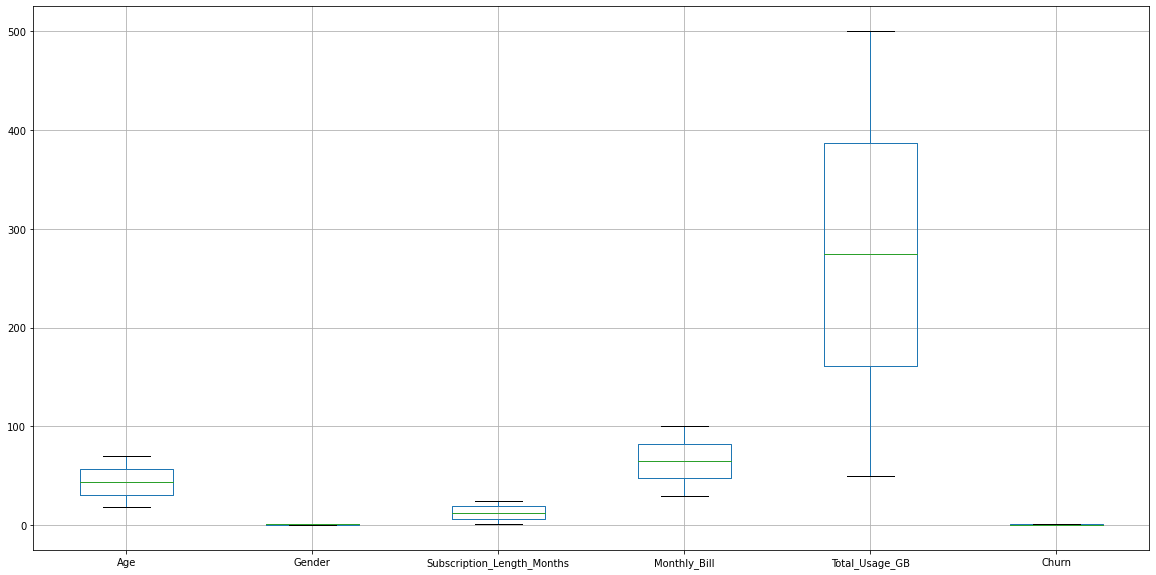

In [34]:
data.boxplot(figsize=(20,10))

In [52]:
#Outlier using IQR test
def outliers_IQR_test(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers=[]
    for i in data:
        if i<=lower or i>=upper:
            outliers.append(i)
    return outliers

In [44]:
data.head(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,0,Los Angeles,17.0,73.36,236.0,0.0


In [51]:
outliers_list = outliers_IQR_test(data.Monthly_Bill)
len(outliers_list)

0

In [45]:
outliers_list = outliers_IQR_test(data.Age)
len(outliers_list)

0

In [46]:
outliers_list = outliers_IQR_test(data.Subscription_Length_Months)
len(outliers_list)

0

In [47]:
outliers_list = outliers_IQR_test(data.Total_Usage_GB)
len(outliers_list)

0

### There are no outliers as well :D

In [76]:
#ProfileReport(data)

In [49]:
data[data.duplicated()]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [264]:
df.describe()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.502160,12.490100,65.053197,274.393650,0.497790
std,15.280283,0.499998,6.926461,20.230696,130.463063,0.499998
min,18.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,0.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,1.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,1.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,1.000000,24.000000,100.000000,500.000000,1.000000


In [54]:
statistics.mode(df.Monthly_Bill.unique())  

73.36

In [57]:
statistics.mode(df.Subscription_Length_Months.unique())  

17.0

In [61]:
data[data.Subscription_Length_Months<1]   #No anomalies found

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


### Applying Onehot Encoding 

In [76]:
Location=data[["Location"]]
Location=pd.get_dummies(Location)   
#Location=pd.get_dummies(Location,drop_first=True) 
Location.head()

,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [75]:
data.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [77]:
data['Chicago']= Location['Location_Chicago']
data['Houston']= Location['Location_Houston']
data['Los Angeles']= Location['Location_Los Angeles']
data['Miami']= Location['Location_Miami']
data['New York']= Location['Location_New York']

In [81]:
data

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,63.0,0,Los Angeles,17.0,73.36,236.0,0.0,0,0,1,0,0
1,62.0,1,New York,1.0,48.76,172.0,0.0,0,0,0,0,1
2,24.0,1,Los Angeles,5.0,85.47,460.0,0.0,0,0,1,0,0
3,36.0,1,Miami,3.0,97.94,297.0,1.0,0,0,0,1,0
4,46.0,1,Miami,19.0,58.14,266.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33.0,0,Houston,23.0,55.13,226.0,1.0,0,1,0,0,0
99996,62.0,1,New York,19.0,61.65,351.0,0.0,0,0,0,0,1
99997,64.0,0,Chicago,17.0,96.11,251.0,1.0,1,0,0,0,0
99998,51.0,1,New York,20.0,49.25,434.0,1.0,0,0,0,0,1


In [82]:
data_LR = data.drop('Location',axis=1)

In [92]:
data_LR.head(1)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,63.0,0,17.0,73.36,236.0,0.0,0,0,1,0,0


### Train test split

In [95]:
x=data_LR.drop('Churn',axis=1)
y=data_LR.Churn

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)

# Starting Model Building

In [103]:
# Imports

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [105]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])
vif_score(x)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,FEATURE,VIF_SCORE
0,Age,1.000070
1,Gender,1.000044
2,Subscription_Length_Months,1.000080
3,Monthly_Bill,1.000095
4,Total_Usage_GB,1.000030
5,Chicago,inf
6,Houston,inf
7,Los Angeles,inf
8,Miami,inf
9,New York,inf


In [ ]:
'''scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)'''   #I will do scaling for logistic regression 

In [205]:
def evaluate_model(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return accuracy,precision,recall,specificity,F1_Score,result

#model_eval(y_test,y_pred_liblinear)

In [168]:
y_train

46628    1.0
92846    0.0
30440    1.0
79978    1.0
85038    0.0
        ... 
59465    0.0
5520     1.0
20463    1.0
18638    0.0
35683    0.0
Name: Churn, Length: 80000, dtype: float64

In [179]:
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier()
}
model_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    #print(evaluate_model(y_test, y_test_pred))
    model_train_accuracy,model_train_precision,model_train_recall,model_train_specificity,model_train_F1_Score,_ = evaluate_model(y_train, model.predict(x_train))
    model_test_accuracy,model_test_precision,model_test_recall,model_test_specificity,model_test_F1_Score,_ = evaluate_model(y_test, model.predict(x_test))

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- specificity: {:.4f}".format(model_train_specificity))
    print("- F1_Score: {:.4f}".format(model_train_F1_Score))
    print('----------------------------------')  
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- specificity: {:.4f}".format(model_test_specificity))
    print("- F1_Score: {:.4f}".format(model_test_F1_Score))
    
    print('='*35)
    print('\n')

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.6886
- Precision: 0.6887
- Recall: 0.6805
- specificity: 0.6966
- F1_Score: 0.6846
----------------------------------
Model performance for Test set
- Accuracy: 0.4990
- Precision: 0.5015
- Recall: 0.4872
- specificity: 0.5110
- F1_Score: 0.4942


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- specificity: 1.0000
- F1_Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.4979
- Precision: 0.5004
- Recall: 0.4929
- specificity: 0.5028
- F1_Score: 0.4966


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- specificity: 1.0000
- F1_Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.4980
- Precision: 0.5005
- Recall: 0.4697
- specificity: 0.5265
- F1_Score: 0.4846


XGBClassifier
Model performance for Training se

### Hyper Parameter Tuning Of RandomForest

In [ ]:
RandomForestClassifier()

In [194]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [5,10,100,150],
                 'criterion': ['gini','entropy'],
                 'max_depth': range(5),
                 'min_samples_split' : [5,10,15,100,150],
                 'min_samples_leaf': range(5)}
rf_classifier=RandomForestClassifier()
rf_model=RandomizedSearchCV(estimator=rf_classifier,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\anaconda3\lib\site-packages\jobl

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(0, 5),
                                        'min_samples_leaf': range(0, 5),
                                        'min_samples_split': [5, 10, 15, 100,
                                                              150],
                                        'n_estimators': [5, 10, 100, 150]},
                   random_state=0, verbose=2)

In [195]:
rf_model.best_params_

{'n_estimators': 150,
 'min_samples_split': 150,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'criterion': 'gini'}

In [206]:
#predicting the values
pred=rf_model.predict(x_test)
_,_,_,_,_,r=evaluate_model(y_test,pred)
r

{'Accuracy': 0.49865,
 'Precision': 0.5036084091622215,
 'Recall': 0.15970149253731344,
 'Specficity': 0.8410050251256281,
 'F1': 0.2425020775100098}

In [207]:
#predicting the values
pred=rf_model.predict(x_train)
_,_,_,_,_,r=evaluate_model(y_train,pred)
r

{'Accuracy': 0.5142875,
 'Precision': 0.5330303030303031,
 'Recall': 0.17709985149387097,
 'Specficity': 0.8469370018127188,
 'F1': 0.26586559353095657}

In [212]:
rf_final=RandomForestClassifier(n_estimators= 150,min_samples_split= 150,min_samples_leaf= 2,max_depth=3,criterion='gini')

In [213]:
rf_final.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=150,
                       n_estimators=150)

In [217]:
pred=rf_final.predict(x_test)
_,_,_,_,_,r=evaluate_model(y_test,pred)
r

{'Accuracy': 0.4983,
 'Precision': 0.5024691358024691,
 'Recall': 0.1619900497512438,
 'Specficity': 0.8379899497487437,
 'F1': 0.2449962377727615}

### Trying with Logistic Regression

In [230]:
x_test

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Chicago,Houston,Los Angeles,Miami,New York
60743,27.0,0,2.0,59.82,364.0,0,1,0,0,0
33949,35.0,0,21.0,47.35,422.0,1,0,0,0,0
52805,63.0,1,6.0,95.91,390.0,0,0,1,0,0
11804,65.0,0,16.0,34.63,59.0,0,0,1,0,0
9229,45.0,1,22.0,93.33,408.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10263,48.0,1,9.0,56.12,267.0,0,0,0,1,0
85435,56.0,1,16.0,41.23,112.0,1,0,0,0,0
26023,55.0,0,24.0,59.64,337.0,1,0,0,0,0
18898,32.0,0,17.0,93.72,473.0,0,0,0,1,0


In [231]:
scalar = StandardScaler()
X_train = scalar.fit_transform(x_train)
X_test = scalar.fit_transform(x_test)

In [238]:
X_test[0]

array([-1.11721684, -1.01207287, -1.52194114, -0.26168123,  0.68552533,
       -0.50234266,  1.98297314, -0.5050731 , -0.49303685, -0.49522972])

In [304]:
logr_liblinear = LogisticRegression(verbose=1,solver='liblinear')

In [305]:
logr_liblinear.fit(x_train,y_train )

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [307]:
logr_liblinear.predict_proba(x_test)

array([[0.51390924, 0.48609076],
       [0.50873987, 0.49126013],
       [0.50823557, 0.49176443],
       ...,
       [0.50430391, 0.49569609],
       [0.5029697 , 0.4970303 ],
       [0.51432503, 0.48567497]])

In [312]:
logr_liblinear.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [314]:
logr_liblinear.predict_log_proba(x_test)

array([[-0.6657086 , -0.72135993],
       [-0.67581845, -0.7107815 ],
       [-0.67681021, -0.70975548],
       ...,
       [-0.68457619, -0.70179227],
       [-0.68722535, -0.69910429],
       [-0.66489985, -0.72221567]])

In [316]:
y_pred_liblinear = logr_liblinear.predict(x_test)
y_pred_liblinear

array([0., 0., 0., ..., 0., 0., 0.])

In [317]:
confusion_matrix(y_test,y_pred_liblinear)

array([[6967, 2983],
       [7035, 3015]], dtype=int64)

In [318]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result
model_eval(y_test,y_pred_liblinear)

{'Accuracy': 0.4991,
 'Precision': 0.5026675558519507,
 'Recall': 0.3,
 'Specficity': 0.7002010050251256,
 'F1': 0.37574775672981053}

In [319]:
auc = roc_auc_score(y_test,y_pred_liblinear)
auc

0.5001005025125629

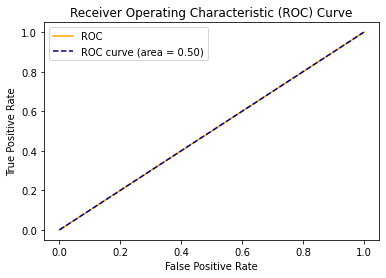

In [322]:
fpr, tpr, thresholds  = roc_curve(y_test,y_pred_liblinear)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## PCA & Column Transformer

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [328]:
df01= df.copy()

In [302]:
ct = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse=False,drop='first'),['Location']),
    ('std_scl',StandardScaler(),df01.columns)
],remainder='passthrough')

In [303]:
pd.DataFrame(ct.fit_transform(df01))

ValueError: could not convert string to float: 'Los Angeles'

##  standard scaling

In [253]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [248]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=30)
x_train1

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Chicago,Houston,Los Angeles,Miami,New York
90776,57.0,0,24.0,72.46,465.0,0,0,0,1,0
4160,37.0,0,12.0,71.10,247.0,0,0,0,0,1
21104,28.0,0,12.0,63.91,428.0,0,1,0,0,0
35830,22.0,1,13.0,36.24,375.0,0,0,1,0,0
75213,51.0,1,15.0,64.61,424.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
46220,59.0,1,1.0,44.44,63.0,0,1,0,0,0
98804,54.0,0,23.0,31.88,407.0,1,0,0,0,0
48045,33.0,0,20.0,31.59,292.0,0,0,0,1,0
70053,42.0,1,18.0,99.73,382.0,0,0,0,1,0


In [251]:
std_sc = StandardScaler()
x_train1 = std_sc.fit_transform(x_train1)
x_test1 = std_sc.fit_transform(x_test1)
x_train1

array([[ 0.85098358, -1.00385744,  1.6625869 , ..., -0.50201092,
         1.99579101, -0.49747918],
       [-0.45910246, -1.00385744, -0.07108977, ..., -0.50201092,
        -0.50105447,  2.01013436],
       [-1.04864117, -1.00385744, -0.07108977, ..., -0.50201092,
        -0.50105447, -0.49747918],
       ...,
       [-0.72111966, -1.00385744,  1.08469468, ..., -0.50201092,
         1.99579101, -0.49747918],
       [-0.13158095,  0.99615738,  0.79574856, ..., -0.50201092,
         1.99579101, -0.49747918],
       [-1.04864117,  0.99615738,  0.07338328, ..., -0.50201092,
        -0.50105447,  2.01013436]])

## PCA 

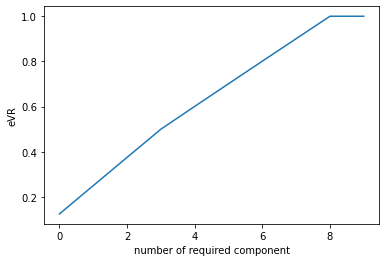

In [254]:
pca = PCA()
pca.fit_transform(x_train1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")
plt.show()

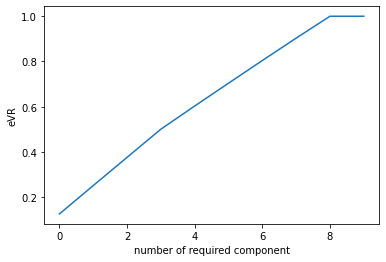

In [255]:
pca = PCA()
pca.fit_transform(x_test1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")
plt.show()

In [256]:
x_train1.shape

(80000, 10)

In [257]:
pca1 = PCA(n_components=8)
x_train1 = pca1.fit_transform(x_train1)
x_test1 = pca1.fit_transform(x_test1)
x_train1

array([[-0.22770996,  1.9554984 , -1.20441625, ...,  0.79504344,
        -0.44279113, -0.4586024 ],
       [ 0.10425593,  0.06829683,  1.27418918, ..., -0.00728761,
         1.11153213, -0.03193088],
       [-1.71845238, -1.25760094, -0.74565995, ..., -0.74886873,
         0.40262031, -0.24041981],
       ...,
       [-0.18465661,  1.93550149, -1.16518919, ...,  1.2146373 ,
         0.27844286,  0.09315948],
       [-0.13140937,  1.9252372 , -1.18324551, ..., -0.74906301,
        -0.68263805, -1.68363934],
       [ 0.18275551,  0.09248605,  1.3021667 , ..., -0.37991842,
         0.04023158, -1.09635317]])

In [258]:
x_train1 = pd.DataFrame(x_train1,columns=['pc1','pc2','pc3','pc4','pc5','6','7','8'])
x_test1 = pd.DataFrame(x_test1,columns=['pc1','pc2','pc3','pc4','pc5','6','7','8'])

x_test1

,pc1,pc2,pc3,pc4,pc5,6,7,8
0,-0.172702,-0.602607,-0.355400,2.103707,-1.036796,-1.605753,0.843274,0.628337
1,-0.408168,-0.776683,2.016610,-0.384243,1.105478,-0.325123,-1.006150,-0.810907
2,-1.198096,1.755287,-0.262392,-0.210517,1.661180,0.289700,0.853765,0.795585
3,2.287272,0.687704,-0.004070,-0.161738,0.000519,-1.746247,-0.935521,-0.149377
4,-0.328468,-0.867344,1.829189,-0.424477,-0.236540,1.412163,-0.322708,-1.365979
...,...,...,...,...,...,...,...,...
19995,-0.250787,-0.718784,1.991667,-0.350862,0.593744,-1.191674,-1.810983,-0.571432
19996,-0.438747,-1.185911,-1.486989,-1.296582,1.129843,-1.190463,0.929099,-0.654804
19997,-1.207887,1.941461,0.010236,-0.165376,0.340496,-0.417778,-0.374267,-0.109393
19998,-0.392373,-0.865544,2.123177,-0.429097,-0.731011,-1.584025,1.307703,0.830627


In [259]:
er = LogisticRegression()
er.fit(x_train1,y_train1)
er.score(x_train1,y_train1)

0.5053875

In [260]:
er.score(x_test1,y_test1)

0.49785

In [261]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestClassifier()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train1,y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

rf_model.best_params_

In [268]:
#predicting the values
pred=rf_model.predict(x_test1)
_,_,_,_,_,r=evaluate_model(y_test,pred)
r

{'Accuracy': 0.49765,
 'Precision': 0.5001683312759511,
 'Recall': 0.44348258706467664,
 'Specficity': 0.5523618090452261,
 'F1': 0.47012288381414485}

In [269]:
#predicting the values
pred=rf_model.predict(x_train1)
_,_,_,_,_,r=evaluate_model(y_train,pred)
r

{'Accuracy': 0.5003,
 'Precision': 0.49357607282184657,
 'Recall': 0.2388431624254323,
 'Specficity': 0.7582379379702515,
 'F1': 0.3219119991858059}

### No use of doing PCA 